In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
dataframe=pd.read_csv("Zomato data .csv")

In [53]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
#print(dataframe.head())

In [54]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [55]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of resturant')

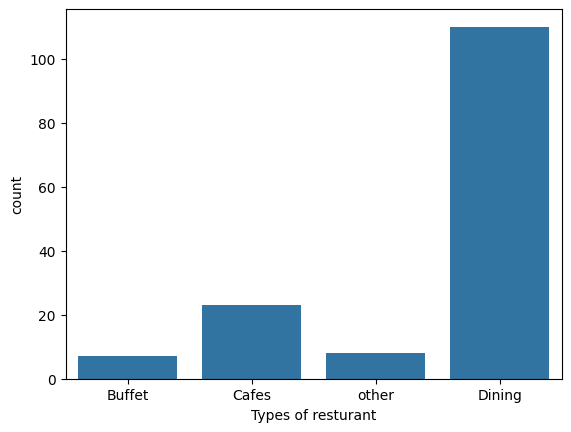

In [58]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Types of resturant")

Text(0, 0.5, 'Votes')

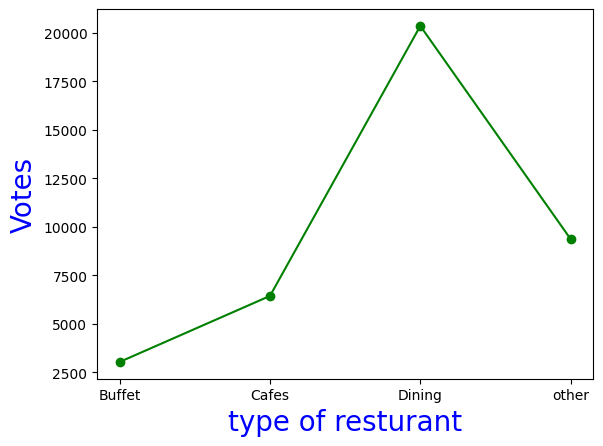

In [59]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of resturant",c="blue",size=20)
plt.ylabel("Votes",c="blue",size=20)

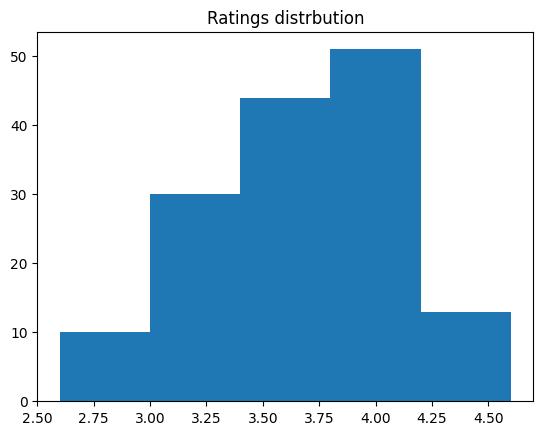

In [60]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings distrbution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

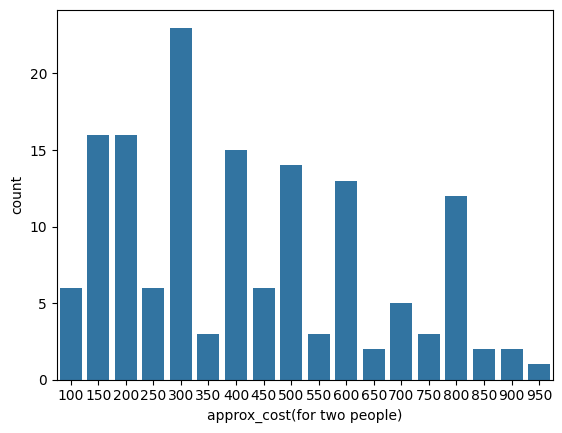

In [61]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion-majority of couples prefer resturants with an average cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

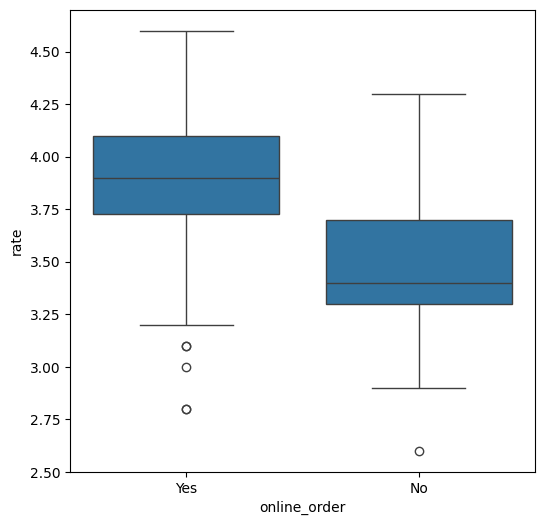

In [62]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

conclusion-offline order receive lower rating in comparison to online order

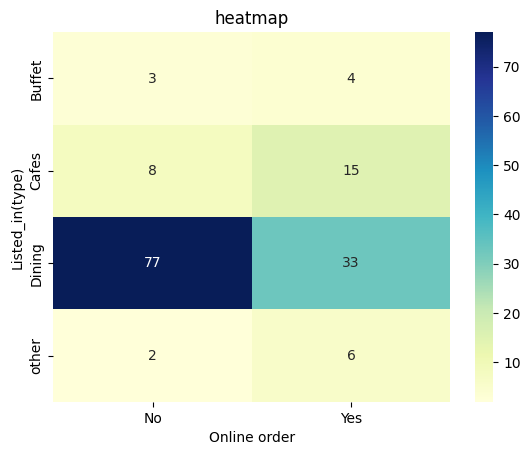

In [67]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed_in(type)")
plt.show()

conclusion-Dining resturnts primarily accept offline oreders whereas cafes primarily receive online orders.This suggests that client prefer orders in resturant ,but prefer online ordering at cafes.